In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

In [14]:
df = pd.read_csv('organizations-and-founding-dates.csv')

In [15]:
year_counts = df['year'].value_counts().to_dict()

print('Year counts:', year_counts)


Year counts: {2022: 6, 2021: 4, 2016: 4, 2020: 1, 2018: 1, 2014: 1, 2012: 1, 2005: 1, 2000: 1}


height: [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 14, 20]
x: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
a: 0.13843941619550315, b: -1.0562704363710336


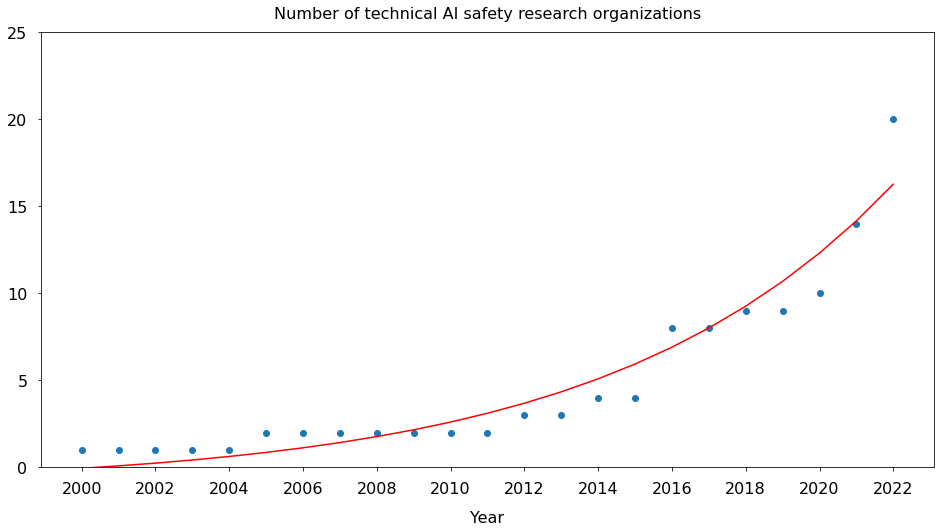

In [16]:
years = np.arange(2000, 2023)

cumulative_counts = {}
cumulative_total = 0

for year in years:
    if year in year_counts:
        cumulative_total += year_counts[year]
    cumulative_counts[year] = cumulative_total

height = list(cumulative_counts.values())
print(f'height: {height}')

fig, ax = plt.subplots(figsize=(16, 8))

# add padding:
ax.set_title('Number of technical AI safety research organizations', fontsize=16, pad=14)
ax.tick_params(axis='both', labelsize=16, pad=10)
ax.set_xlabel('Year', fontsize=16, labelpad=14)
ax.set_xticks(np.arange(2000, 2023, 2))
ax.set_ylim(0, 25)

print(f'x: {years}')

ax.scatter(years, height)

# Fit curve to scatter points
xdata = np.arange(2000, 2023)

def f(x, a, b):
    return (1 + a) ** (x - 2000) + b

popt, _ = curve_fit(f, xdata, height)
print(f'a: {popt[0]}, b: {popt[1]}')

ydata = f(xdata, *popt)

ax.plot(xdata, ydata, color='red');

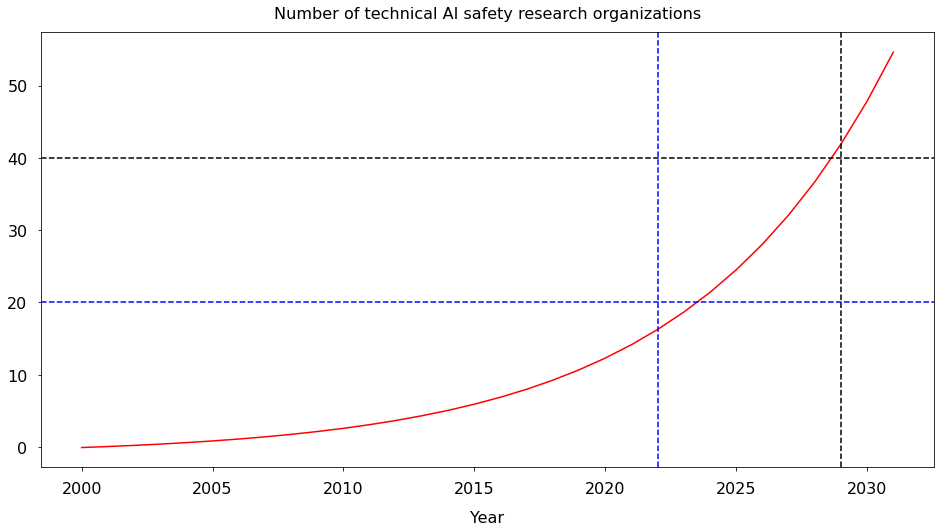

In [17]:
# Extend the graph over time:
fig, ax = plt.subplots(figsize=(16, 8))

years = np.arange(2000, 2032)
model_output = f(years, *popt)

ax.plot(years, model_output, color='red')

ax.axvline(x=2022, color='blue', linestyle='dashed')
ax.axhline(y=20, color='blue', linestyle='dashed')

ax.axvline(x=2029, color='black', linestyle='dashed')
ax.axhline(y=40, color='black', linestyle='dashed')

ax.set_title('Number of technical AI safety research organizations', fontsize=16, pad=14)
ax.set_xlabel('Year', fontsize=16, labelpad=14)
ax.tick_params(axis='both', labelsize=16, pad=10)

In [18]:
# Show the estimated number of AI safety researchers over time:

'''
How to model this:
- Assume that the number of researchers increases linearly in each organization from its founding date until the present.

1. Start with the current number of researchers in 2022.
2. Calculate the annual decrease rate backwards in time as the current number of researchers divided by the age of the organization.
3. Show how the number of researchers decreases from 2022 until the 0 at the founding date.
4. Aggregate all these numbers by year to get an overall idea of how the number of researchers has changed over time.

Example: CHAI:
- 30 researchers in 2022, 25 in 2021 ... until 0 in 2015.
'''

researchers_over_time = {}

all_years_reversed = [y for y in range(2022, 1999, -1)]

# loop through the rows:
for index, row in df.iterrows():
    name, current_num_researchers, year_founded = row['name'], row['researchers'], row['year']
    age = (2022 - year_founded) + 1
    annual_increase = current_num_researchers / age
    researchers_over_time[name] = []
    total = current_num_researchers

    for y in all_years_reversed:
        researchers_over_time[name].append(round(total))
        if round(total - annual_increase) >= 0:
            total -= annual_increase

year_totals = [0] * len(all_years_reversed)

for i in range(len(all_years_reversed)):
    for name, arr in researchers_over_time.items():
        year_totals[i] += arr[i]

print(year_totals, len(year_totals))


[252, 168, 126, 100, 77, 53, 39, 25, 22, 18, 14, 12, 10, 10, 8, 7, 6, 5, 3, 3, 2, 1, 1] 23


a: 0.28107058653278266, b: -4.112454866298807


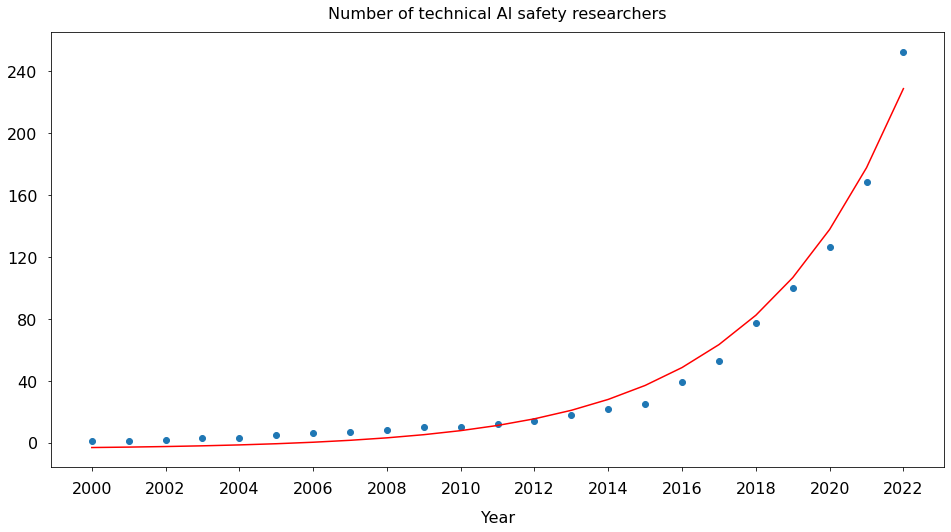

In [19]:
# Graph the number of researchers over time:
cumulative_num_researchers = [n for n in reversed(year_totals)]
years = np.arange(2000, 2023)

# print('cumulative_num_researchers by year:')
# for i in range(len(years)):
#     print(f'researchers in {years[i]}: {cumulative_num_researchers[i]}')

popt, _ = curve_fit(f, years, cumulative_num_researchers)
print(f'a: {popt[0]}, b: {popt[1]}')

num_researchers = f(years, *popt)

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(years, cumulative_num_researchers, marker='o')
ax.plot(years, num_researchers, color='red')

ax.set_title('Number of technical AI safety researchers', fontsize=16, pad=14)
ax.set_xlabel('Year', fontsize=16, labelpad=14)
ax.tick_params(axis='both', labelsize=16, pad=10)

ax.set_xticks(np.arange(2000, 2023, 2));
ax.set_yticks(np.arange(0, 250, 40));


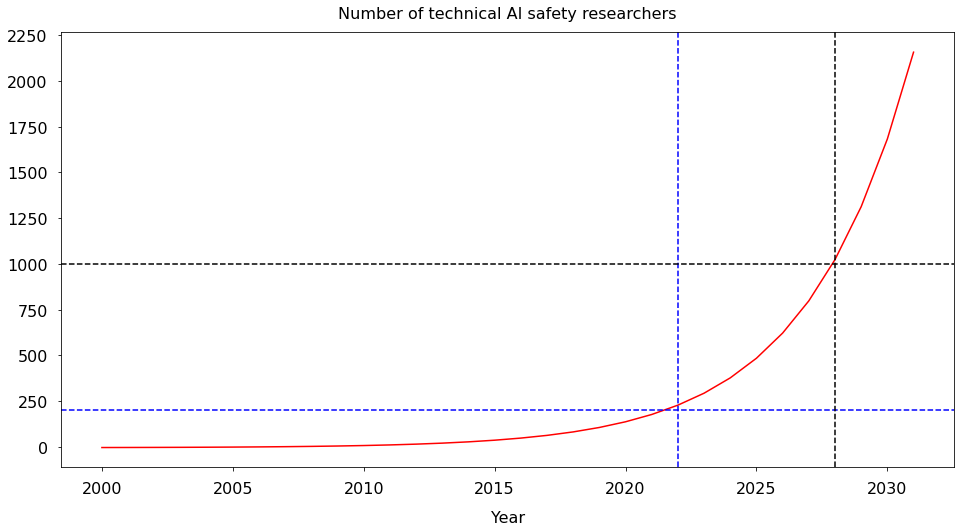

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))

years = np.arange(2000, 2032)
num_researchers_projected = f(years, *popt)

ax.plot(years, num_researchers_projected, color='red')
ax.set_title('Number of technical AI safety researchers', fontsize=16, pad=14)
ax.set_xlabel('Year', fontsize=16, labelpad=14)
ax.tick_params(axis='both', labelsize=16, pad=10)
ax.set_yticks(np.arange(0, 2500, 250))

ax.axvline(x=2022, color='blue', linestyle='dashed')
ax.axhline(y=200, color='blue', linestyle='dashed')

ax.axvline(x=2028, color='black', linestyle='dashed')
ax.axhline(y=1000, color='black', linestyle='dashed')

productivity in 2022: 15.280257308587535
productivity in 2028: 32.07821643375374
[2023 2024 2025 2026 2027 2028]
area_before_2023: 118.35423879073159, area_after_2023: 119.76941080980586


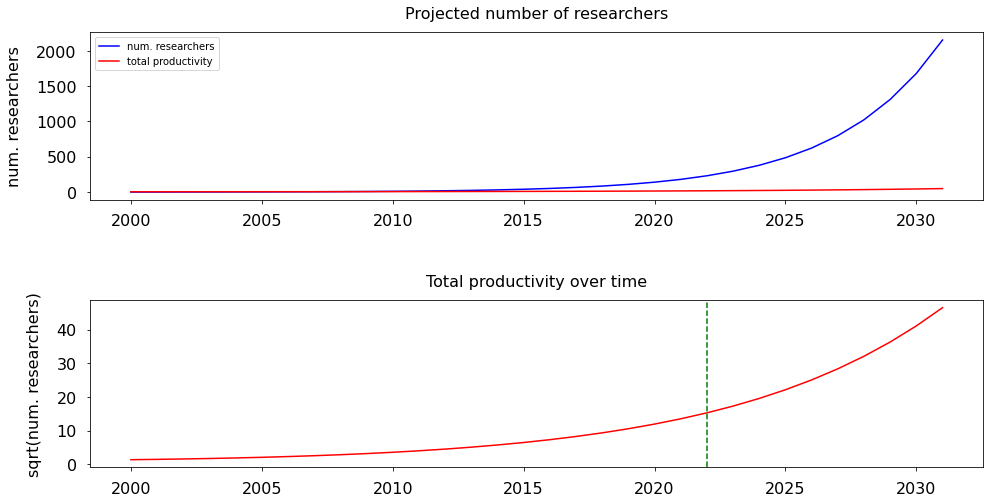

In [21]:
# Model productivity as increasing with the square root of the number of researchers (Price's Law):
# Note: Lotka's Law is known to be more accurate. See the scripts below on Lotka's Law.

fig, ax = plt.subplots(2, 1, figsize=(16, 8))
plt.subplots_adjust(hspace=0.6)
for axis in ax:
    axis.tick_params(axis='both', labelsize=16, pad=10)

years = np.arange(2000, 2032)

productivity = np.sqrt(num_researchers_projected + 5)    # 5 removes negative values
print(f'productivity in 2022: {productivity[22]}')
print(f'productivity in 2028: {productivity[28]}')

ax[0].set_title('Projected number of researchers', fontsize=16, pad=14)
ax[0].set_ylabel('num. researchers', fontsize=16, labelpad=14)
ax[0].plot(years, num_researchers_projected[:len(years)], color='blue')
ax[0].plot(years, productivity, color='red')
ax[0].legend(['num. researchers', 'total productivity'])

ax[1].set_title('Total productivity over time', fontsize=16, pad=14)
ax[1].set_ylabel('sqrt(num. researchers)', fontsize=16, labelpad=14)
ax[1].plot(years, productivity, color='red')
ax[1].axvline(x=2022, color='green', linestyle='dashed')

print(years[23:29])

area_before_2023 = np.trapz(productivity[:23], years[:23])
area_after_2023 = np.trapz(productivity[23:29], years[23:29])

print(f'area_before_2023: {area_before_2023}, area_after_2023: {area_after_2023}')

In [22]:
def get_total_posts(c = 80):
    posts = {}
    for x in range(1, 21):
        num_posts = (c / x**2.5) * x
        posts[x] = num_posts
    total_posts = sum([round(x) for x in posts.values()])
    return total_posts, posts


In [23]:
n1, n2 = 80, 160
total_posts_2022, posts_2022 = get_total_posts(n1)
total_posts_2028, posts_2028 = get_total_posts(n2)

print(f'total_posts_2022: {total_posts_2022}, total_posts_2028: {total_posts_2028}')
print(f'difference in the number of researchers: {n2 / n1 * 100}%')
print(f'difference in the number of posts: {total_posts_2028 / total_posts_2022 * 100}%')


total_posts_2022: 173, total_posts_2028: 347
difference in the number of researchers: 200.0%
difference in the number of posts: 200.5780346820809%


area in 2022: 133.20735211998803, area in 2028: 266.41470423997606
difference in area: 200.0%


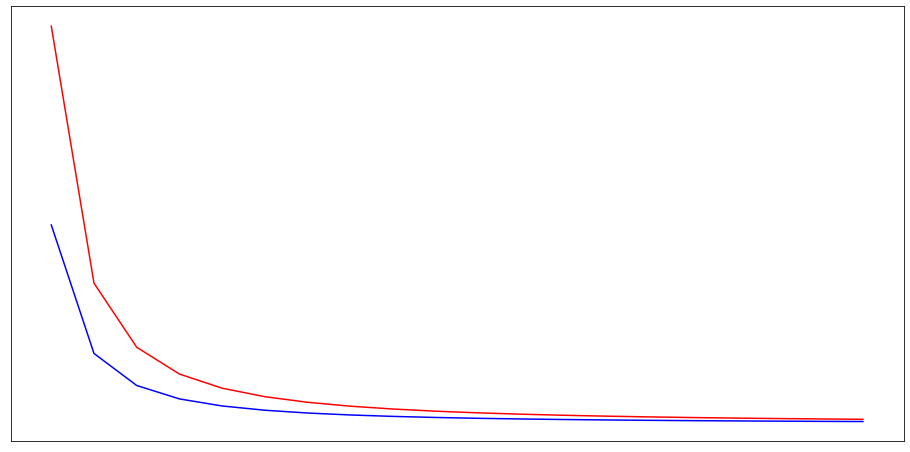

In [24]:
x1 = list(posts_2022.keys())
counts1 = list(posts_2022.values())
x2 = list(posts_2028.keys())
counts2 = list(posts_2028.values())

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x1, counts1, color='blue', label='2022')
ax.plot(x2, counts2, color='red', label='2028')
ax.set_xticks([])
ax.set_yticks([])

a1 = np.trapz(counts1, x1)
a2 = np.trapz(counts2, x2)

print(f'area in 2022: {a1}, area in 2028: {a2}')
print(f'difference in area: {a2 / a1 * 100}%')